## Introduction

The healthcare insurance landscape is complex, offering a multitude of plans with varying coverage, costs, and benefits. Individuals often struggle to navigate this complexity, leading to inferior choices that may not fully address their unique needs and financial circumstances. This project aims to develop an intelligent recommender system that simplifies the insurance plan selection process. By leveraging user profiles and plan characteristics, the system will provide personalized recommendations, ensuring individuals find plans that align with their specific requirements. This system seeks to bridge the gap between the abundance of available insurance options and the individual's ability to make informed decisions, ultimately improving user satisfaction and access to appropriate healthcare coverage.

## Problem Statement

Many individuals find it challenging to select an appropriate health insurance plan due to the overwhelming number of available options, intricate plan details, and a lack of personalized guidance. This often results in:

* Suboptimal Coverage: Individuals may choose plans that do not adequately cover their specific health needs or pre-existing conditions.

* Financial Burden: Users may select plans with excessive premiums or out-of-pocket costs, leading to unnecessary financial strain.

* Decision Fatigue: The complexity of the insurance market can lead to decision fatigue, causing individuals to make rushed or uninformed choices.

* Knowledge gap: Individuals often lack the expertise to compare and evaluate complex insurance plans effectively.

Therefore, there is a need for a user-friendly system that can intelligently recommend insurance plans based on individual profiles and preferences, thereby mitigating these challenges.

### Objectives

* To develop a content-based recommender system that suggests suitable insurance plans based on user demographics, socioeconomic factors, and health-related information.

* Address the real-world challenge of insurance plan selection by integrating domain-specific knowledge and regulatory compliance considerations into the model

### Data Limitations

This project utilizes a synthetic dataset, which presents certain limitations:

1. Synthetic Nature: The data is not derived from real-world user interactions or insurance transactions. This may limit the generalizability of the recommender system to actual user behavior.

2. Potential Biases: synthetic data may still contain inherent biases that do not reflect real-world populations.

3. Limited External Factors: The synthetic data might not capture all external factors that influence insurance plan choices, such as economic conditions or regulatory changes.

4. Data Accuracy: While the data has been made to be accurate, there is always the possibility of errors within synthetic data.

## Exploratory Data Analysis (EDA)

### Data Loading and Initial Inspection

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('../health_insurance_recommender.csv')

# display the first five rows
df.head()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Kenya,Urban,Self-Employed,342.147528,Cancer,2,2614.37,...,Bachelor's,5,No,Yes,No,Yes,High,50000,Life Healthcare,Medium
1,2,27.0,Male,Kenya,Semi-Urban,Unemployed,23.271139,None,1,3343.49,...,Master's,10,Yes,Yes,No,Yes,High,1000000,Netcare,Slow
2,3,74.0,Male,Kenya,Urban,Unemployed,7605.332784,None,5,4615.26,...,Diploma,1,No,Yes,Yes,Yes,High,1000000,Netcare,Fast
3,4,38.0,Male,Kenya,Rural,Employed,2349.243288,Cancer,3,612.38,...,Diploma,5,No,Yes,No,No,High,1000000,Netcare,Medium
4,5,43.0,Male,Kenya,Urban,Employed,17.187938,Asthma,4,2314.12,...,Bachelor's,0,No,Yes,No,Yes,High,1000000,Aga Khan Hospital,Fast


In [8]:
features = pd.read_excel('../health_insurance_features_definitions.xlsx')
features

,Feature,Definition
0,user_id,Unique identifier for each user
1,age,Age of the user
2,gender,"Gender of the user (Male, Female, Other)"
3,country,Country of residence
4,monthly_income,User's monthly income in USD
5,health_condition,"Primary health condition of the user (e.g., Di..."
6,plan_cost,Monthly cost of the insurance plan in USD
7,deductible_amount,Amount user pays before insurance covers expenses
8,out_of_pocket_max,Maximum amount user pays per year before full ...
9,family_size,Number of dependents in the family


In [ ]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

The dataset contains 52,500 rows and 42 columns. Some columns have missing values. For instance, age has 49,859 non-null values, meaning there are missing age values. The dataset contains a mix of numerical (integer and float) and categorical (object) data, 

### Check for missing values

In [ ]:
# display only columns with missing values and their count
missing_values = df.isna().sum().loc[lambda x : x > 0]
print(missing_values)

age                         2641
monthly_income              2636
user_satisfaction_rating    2619
dtype: int64


### Descriptive statistics

In [8]:
# summary statistics
df.describe()

,user_id,age,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,duplicate_plan_cost,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit
count,52500.000000,49859.000000,49864.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,49881.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,24980.571486,48.535911,2229.294781,2.492286,2542.757659,599.710239,113.864270,381.808335,3.001423,27581.730840,4.911219,3.501067,4.990590,315353.333333
std,14433.032416,17.922048,3993.264625,1.705581,1416.930992,1029.239746,200.843563,634.008554,1.419540,13051.249725,6.010216,1.709279,3.155993,347630.969987
min,1.000000,18.000000,1.281549,0.000000,100.030000,1.260237,0.126121,1.260728,1.000000,5000.160000,0.000000,1.000000,0.000000,0.000000
25%,12479.750000,33.000000,59.004709,1.000000,1316.652500,22.398519,3.185938,21.623265,2.000000,16220.612500,1.000000,2.000000,2.000000,50000.000000
50%,24974.500000,48.000000,611.079480,2.000000,2540.765000,168.510240,31.528224,107.380008,3.000000,27641.475000,3.000000,4.000000,5.000000,100000.000000
75%,37471.250000,64.000000,1360.548180,4.000000,3766.235000,354.352950,69.125184,215.736066,4.000000,38970.142500,6.000000,5.000000,8.000000,500000.000000
max,50000.000000,79.000000,19434.987400,5.000000,4999.990000,4859.763804,971.922240,2915.811432,5.000000,49999.710000,24.000000,6.000000,10.000000,1000000.000000


General Overview

The dataset contains 52,500 records, but some columns have missing values (e.g., age, monthly_income, and user_satisfaction_rating have fewer entries).
The numerical values have a wide range, suggesting the presence of high variability among users.

In [9]:
df.describe(include='object')

,gender,country,region,employment_status,pre_existing_conditions,hospital_preference,previous_insurance_coverage,preferred_coverage_type,insurance_provider,medication_coverage,...,marital_status,employment_type,education_level,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,preferred_hospital,claim_reimbursement_speed
count,52500,52500,52500,52500,52500,52500,52500,52500,52500,52500,...,52500,52500,52500,52500,52500,52500,52500,52500,52500,52500
unique,3,1,3,3,6,3,2,3,7,2,...,4,3,5,2,2,2,2,3,5,3
top,Male,Kenya,Semi-Urban,Self-Employed,HIV,Public,No,Standard,Britam Insurance,Yes,...,Single,Salaried,Diploma,Yes,Yes,Yes,Yes,Medium,Life Healthcare,Slow
freq,17563,52500,17704,17738,8900,17683,26321,17676,7597,26451,...,13195,17574,10642,26358,26325,26299,26534,17606,10659,17579


## Insights

* The dataset is heavily skewed towards Kenya, meaning the recommender system should focus on local insurance preferences.

* Semi-Urban residents and Self-Employed individuals dominate the dataset, implying the need for policies catering to freelancers and small business owners.

* HIV is the most common pre-existing condition, which suggests a strong demand for specialized medical coverage.

* A large portion does not have prior insurance (26,321 individuals), indicating potential for market expansion.

* "Standard" coverage is most preferred, meaning customers balance affordability and benefits.

* Slow claim reimbursement is a concern, so users might value providers with faster processes.

### Check for any duplicate

In [9]:
duplicates = df.duplicated().sum()
duplicates

0

In [12]:
# Check if the columns are identical
print((df['country'] == df['duplicate_country']).all())  # True if identical


True


In [ ]:
# Check if the columns are identical
print((df['plan_cost'] == df['duplicate_plan_cost']).all())  # True if identical

False


From the above outcome it shows that country and duplicate_country are identical while plan_cost and duplicate_plan_cost there are values in the two columns that do not match.

In [19]:
# Display the unique values in the target variable
print(df['recommended_plan'].unique())

# Display the value counts (frequency) of each unique value
print("\nValue counts:")
print(df['recommended_plan'].value_counts())

['Premium' 'Basic' 'Standard']

Value counts:
Premium     17642
Basic       17528
Standard    17330
Name: recommended_plan, dtype: int64


In [13]:
#select cateorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#count unique values in each categorical column
for col in categorical_cols:
    print(df[col].value_counts(), "\n")

Male      17563
Other     17500
Female    17437
Name: gender, dtype: int64 

Kenya    52500
Name: country, dtype: int64 

Semi-Urban    17704
Rural         17416
Urban         17380
Name: region, dtype: int64 

Self-Employed    17738
Unemployed       17452
Employed         17310
Name: employment_status, dtype: int64 

HIV             8900
Asthma          8879
Hypertension    8769
Cancer          8765
Diabetes        8628
None            8559
Name: pre_existing_conditions, dtype: int64 

Public              17683
Private             17448
Mission Hospital    17369
Name: hospital_preference, dtype: int64 

No     26321
Yes    26179
Name: previous_insurance_coverage, dtype: int64 

Standard    17676
Premium     17500
Basic       17324
Name: preferred_coverage_type, dtype: int64 

Britam Insurance     7597
Jubilee Insurance    7577
UAP Insurance        7509
NHIF                 7501
Old Mutual           7482
AAR Insurance        7447
Sanlam Insurance     7387
Name: insurance_provider, dtyp

## Univariate Analysis

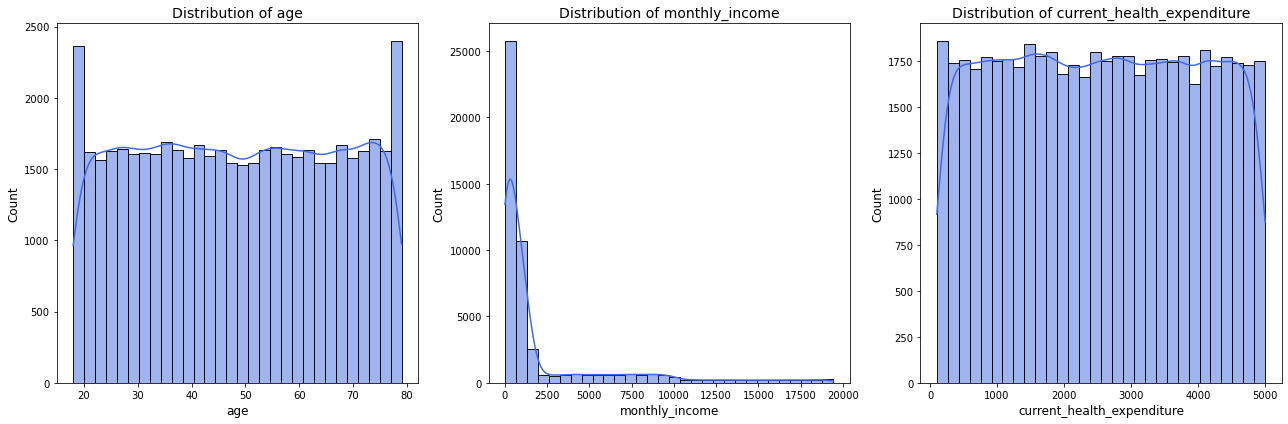

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = ['age', 'monthly_income', 'current_health_expenditure']

# Set figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for side-by-side plots

# Loop through numerical columns and plot histograms
for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], kde=True, ax=ax, color='royalblue', bins=30)  # Histogram with KDE
    ax.set_title(f'Distribution of {col}', fontsize=14)  # Set title
    ax.set_xlabel(col, fontsize=12)  # X-axis label
    ax.set_ylabel('Count', fontsize=12)  # Y-axis label

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Observations

* The age distribution appears uniform across different values, meaning all ages occur with similar frequency.There are peaks at the edges, suggesting higher counts for the youngest and oldest individuals.

* Monthly Income shows a high concentration at the lower end, meaning most individuals have lower monthly incomes.This suggests income inequality, where only a small percentage earn high salaries.

* Current Health Expenditure, the distribution appears uniform.

* The peaks at the edges in age and expenditure suggest possible data biases or categorical grouping effects.



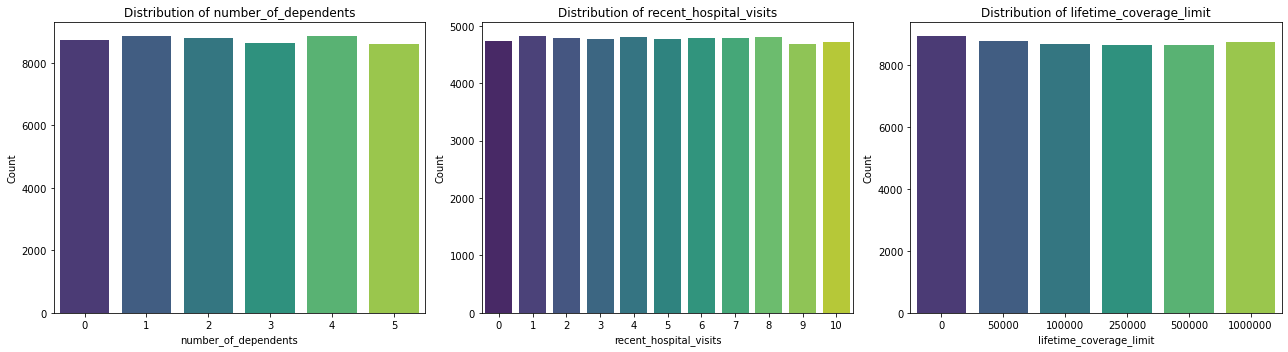

In [30]:

# Set the figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List of discrete variables
numerical_cols = ['number_of_dependents', 'recent_hospital_visits', 'lifetime_coverage_limit']

# Loop through each variable and plot a countplot
for i, var in enumerate(numerical_cols):
    sns.countplot(x=df[var], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


### observation

The distributions are relatively uniform, indicating no major bias in the dataset for these variables.

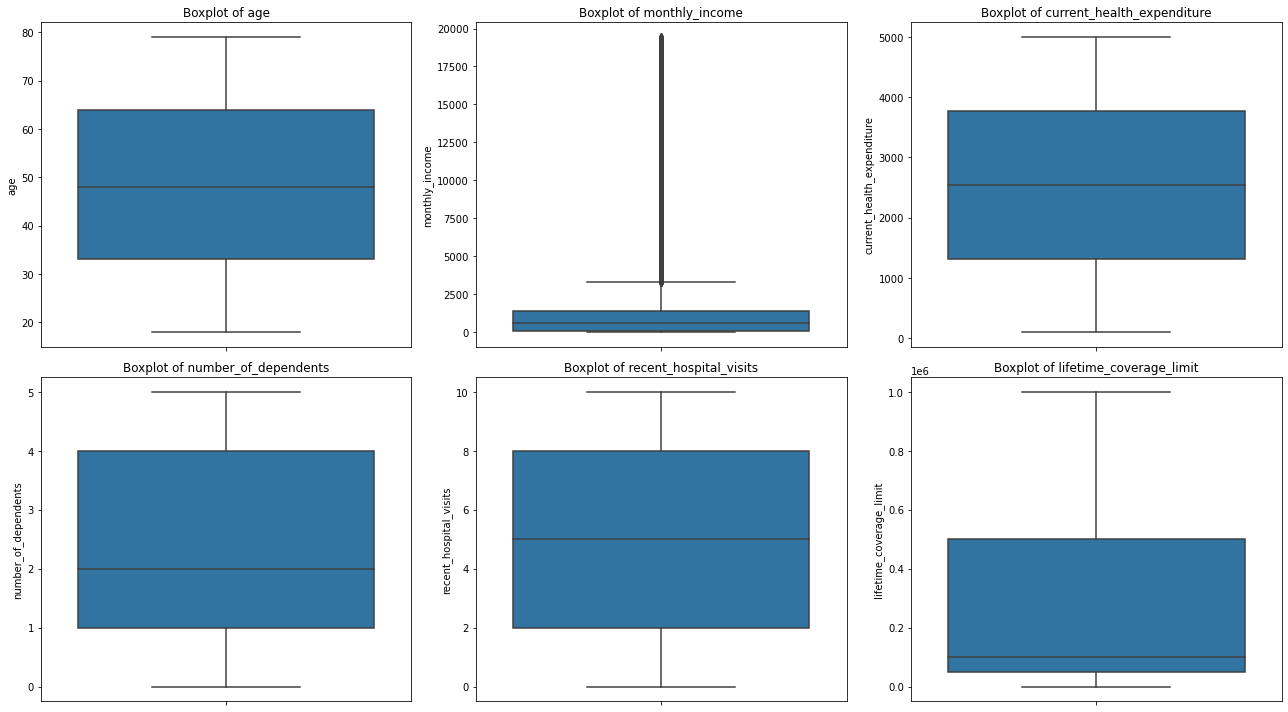

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = ['age', 'monthly_income', 'current_health_expenditure', 
                  'number_of_dependents', 'recent_hospital_visits', 'lifetime_coverage_limit']

# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

# Loop through numerical columns and plot boxplots
for ax, col in zip(axes.flat, numerical_cols):
    sns.boxplot(y=df[col], ax=ax)  # Boxplot
    ax.set_title(f'Boxplot of {col}')  # Set title

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Observations

* Age, hospital visits, health expenditure and dependents seem fairly normally distributed.

* **Monthly Income**: There is a significant presence of outliers ,indicated by the points beyond the whiskers.The box is very compressed, suggesting that most of the income values are concentrated in a small range, with a few high-income individuals driving the extreme values.
* **Lifetime Coverage Limit**: The distribution is skewed, with a long tail extending upwards, suggesting a few individuals have very high coverage limits.

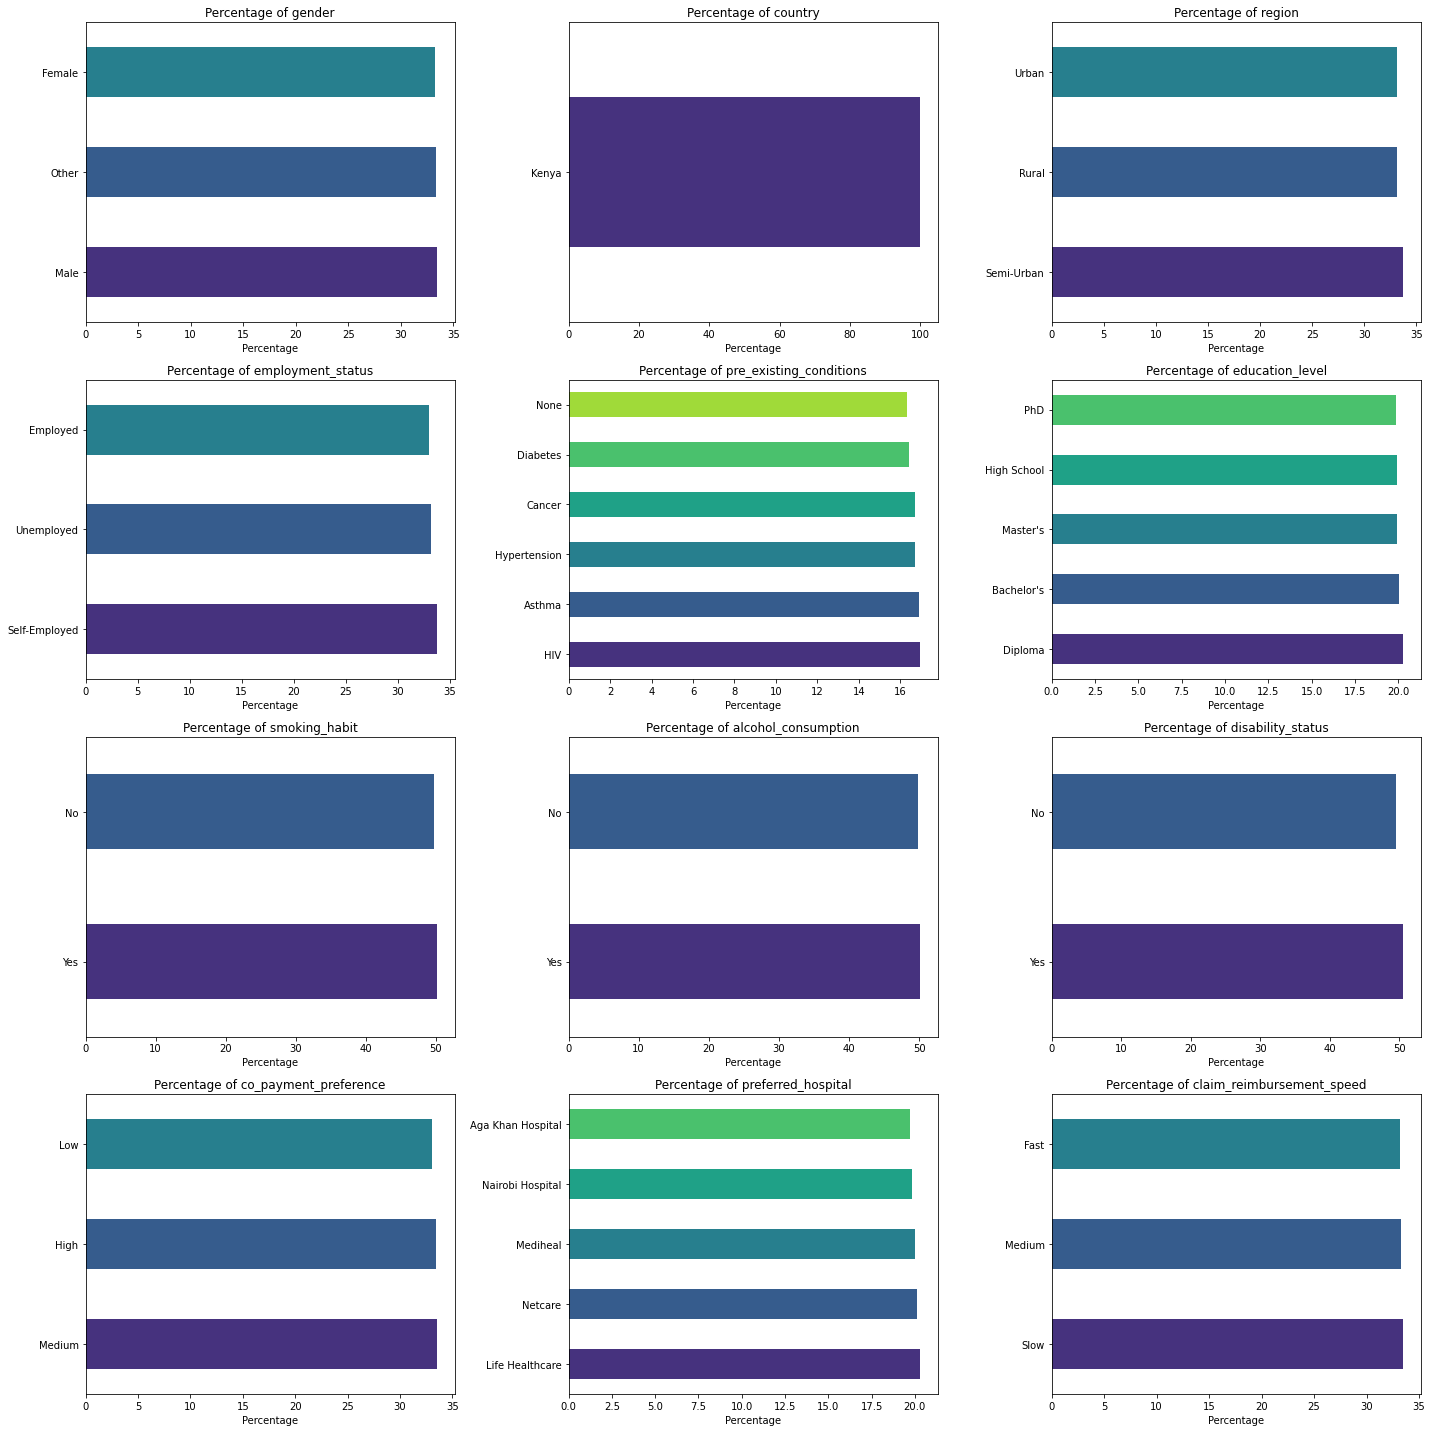

In [40]:
# Define categorical columns
categorical_cols = ['gender', 'country', 'region', 'employment_status', 'pre_existing_conditions',
                    'education_level', 'smoking_habit', 'alcohol_consumption', 'disability_status',
                    'co_payment_preference', 'preferred_hospital', 'claim_reimbursement_speed']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    category_counts = df[col].value_counts(normalize=True) * 100
    category_counts.plot(kind='barh', ax=ax, color=sns.color_palette("viridis"))
    ax.set_title(f'Percentage of {col}')
    ax.set_xlabel('Percentage')

plt.tight_layout()
plt.show()


### Observation

* Country has 100% of the respondents from Kenya, this indicates that any insights or recommendations generated from this dataset are specific to Kenya.

* Gender, region, pre_existing_conditions, smoking_habit, acohol_consumption, disability status, co_payment_preference, prefered_hospital appear evenly distributed.

* Self-Employed individuals have the highest percentage, followed by Employed and Unemployed.This suggests that many individuals in the dataset rely on self-employment.

* Education Level is relatively even, but Diploma holders form the largest group, while PhD holders have a slightly smaller proportion.

* The majority of reimbursement_speed is  slow or medium claim.

## Bivariate analysis

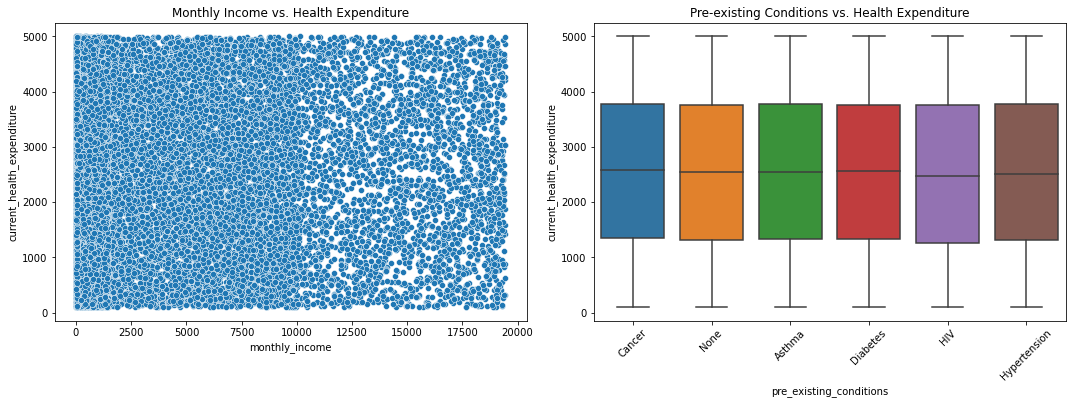

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Numerical vs. Numerical
sns.scatterplot(x='monthly_income', y='current_health_expenditure', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Monthly Income vs. Health Expenditure')

# Numerical vs. Categorical
sns.boxplot(x='pre_existing_conditions', y='current_health_expenditure', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Pre-existing Conditions vs. Health Expenditure')
axes[0, 1].tick_params(axis='x', rotation=45)

# Hide the unused subplot
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### Observation

* Monthly income vs health expenditure indicate that individuals in lower income groups have a different expenditure pattern than higher income groups.

* Some variation may exist, but overall, the expenditure range is similar across conditions.

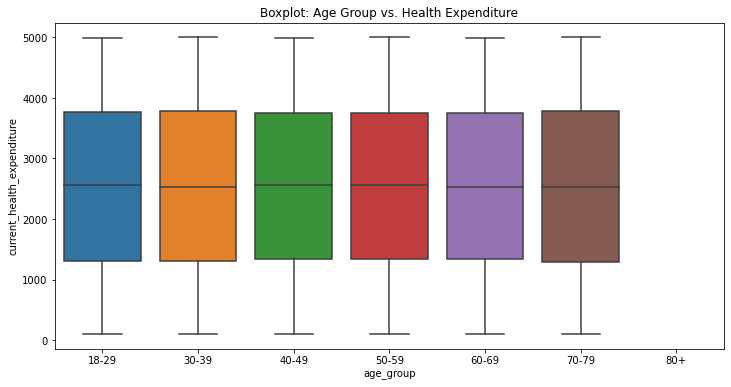

In [48]:
# Create age bins
bins = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='current_health_expenditure', data=df)
plt.title('Boxplot: Age Group vs. Health Expenditure')
plt.show()

#remove the created column from the dataframe.
df = df.drop(columns = 'age_group')

### Observation

* The distribution of health expenditure is consistent across categories

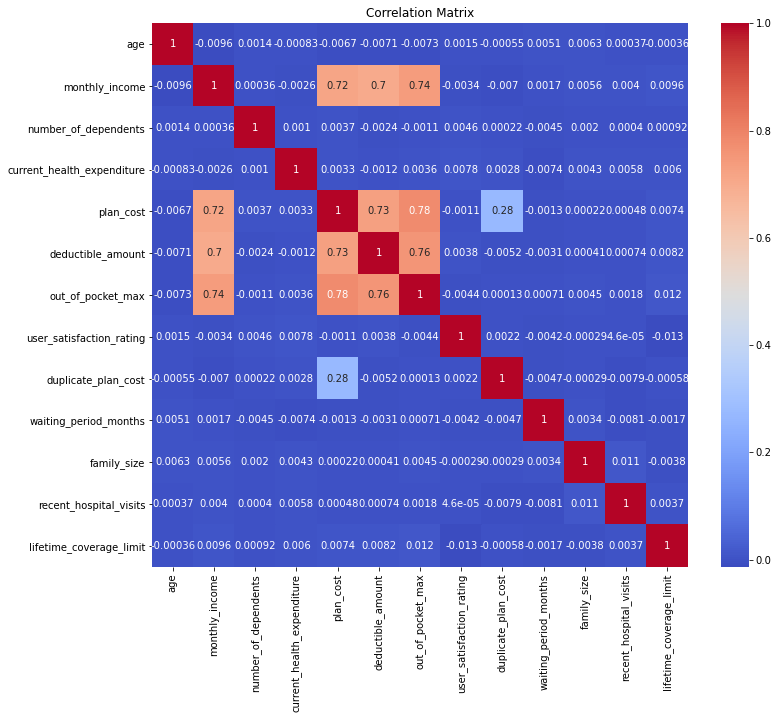

In [17]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 ## Key Observations

1. High Positive Correlations (Red Boxes):

Some variables have a strong positive correlation (above 0.7), which suggests they are closely related.
For example, a cluster of variables in the middle shows values like 0.72, 0.74, 0.78, 0.76, meaning they likely measure similar aspects (e.g., employment type and income level or insurance provider and coverage type).

2. Moderate Positive Correlations (Orange Shades):

A correlation of 0.28 appears, which is a weak to moderate positive correlation.
This suggests some level of association but not a strong relationship.

3. Weak or No Correlation (Blue Shades):

Most of the other values are close to 0 (e.g., 0.003, -0.007, 0.0004), indicating that many variables in the dataset are independent of each other.
This means that changes in one variable do not strongly impact another.

4. Negative Correlations (Light Blue to Dark Blue):

Some values are negative but small (e.g., -0.007, -0.0026, -0.00083).
These negative correlations suggest an inverse relationship, but the effect is weak.